In [220]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import matplotlib.pyplot as plt 

In [26]:
data= pd.read_csv(r"C:\Users\diyas\Downloads\MasterDatasetTemp_Preprocessed_Anonymized_small.csv") 

In [27]:
#DT Model 1: only numerical values with tier as target 

#selecting only numerical columns
df= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','TierLevel']]

#clean, preprocess missing values 
df['NoofInternships'] = df['NoofInternships'].fillna(0)
df['TierLevel'] = df['TierLevel'].fillna(0)
df['NoofProjects'] = df['NoofProjects'].fillna(0)
df=df.fillna(df.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [28]:
df.head()

,10thMarks,12thPercentage,CGPA,NoofInternships,NoofProjects,TierLevel
0,96.000000,90.0,9.68,0.0,0.0,1.0
1,92.150000,97.6,8.83,0.0,7.0,2.0
2,92.150000,97.6,8.83,0.0,7.0,1.0
3,95.000000,96.0,9.27,0.0,4.0,0.0
4,93.386967,94.0,8.95,0.0,5.0,1.0


In [69]:
#selecting target and features
p=list(df.columns)
p.remove('TierLevel')
X = df[p] # Features
y = df.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

In [75]:
#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=5)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 2
Accuracy: 0.80
Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.71      1.00      0.83         5
         2.0       1.00      0.75      0.86         4

    accuracy                           0.80        10
   macro avg       0.57      0.58      0.56        10
weighted avg       0.76      0.80      0.76        10

Confusion Matrix:  [[0 1 0]
 [0 5 0]
 [0 1 3]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
df.corr()

,10thMarks,12thPercentage,CGPA,NoofInternships,NoofProjects,TierLevel
10thMarks,1.000000,0.138018,0.175472,-0.009189,-0.037412,-0.000155
12thPercentage,0.138018,1.000000,0.507541,0.061918,0.073914,-0.210405
CGPA,0.175472,0.507541,1.000000,0.171165,-0.027421,-0.297901
NoofInternships,-0.009189,0.061918,0.171165,1.000000,0.248378,-0.030174
NoofProjects,-0.037412,0.073914,-0.027421,0.248378,1.000000,-0.050432
TierLevel,-0.000155,-0.210405,-0.297901,-0.030174,-0.050432,1.000000


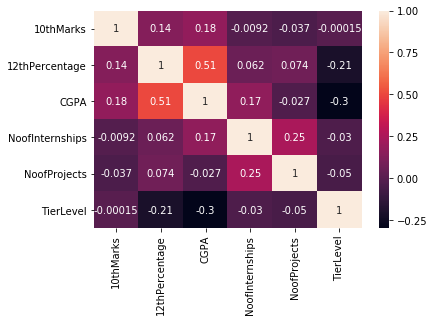

In [221]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [78]:
#DT Model 2: only numerical values with Company name as target 

#selecting only numerical columns
df2= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','CompanyName_New']]

#clean, preprocess missing values 
df2['NoofInternships'] = df2['NoofInternships'].fillna(0)
df2['CompanyName_New'],_ = pd.factorize(df2['CompanyName_New'])
df2['NoofProjects'] = df2['NoofProjects'].fillna(0)
df2=df2.fillna(df.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [132]:
#selecting target and features
p=list(df2.columns)
p.remove('CompanyName_New')
X = df2[p] # Features
y = df2.CompanyName_New # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 35
Accuracy: 0.10
Report :                precision    recall  f1-score   support

          -1       0.20      0.33      0.25         3
           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.11      0.50      0.18         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#DT Model 3: numerical values+branch with tier as target 

#selecting only numerical columns
df3= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel']]

#clean, preprocess missing values 
df3['NoofInternships'] = df3['NoofInternships'].fillna(0)
df3['TierLevel'] = df3['TierLevel'].fillna(0)
df3['NoofProjects'] = df3['NoofProjects'].fillna(0)
df3['Branch'],_ = pd.factorize(df3['Branch'])
df3=df3.fillna(df.mean())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [130]:
#selecting target and features
p=list(df3.columns)
p.remove('TierLevel')
X = df3[p] # Features
y = df3.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=1)

#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 2
Accuracy: 0.83
Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       1.00      0.86      0.92         7
         2.0       0.67      1.00      0.80         4

    accuracy                           0.83        12
   macro avg       0.56      0.62      0.57        12
weighted avg       0.81      0.83      0.81        12

Confusion Matrix:  [[0 0 1]
 [0 6 1]
 [0 0 4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
#DT Model 4: numerical values+branch+programming lang with tier as target 

#selecting only numerical columns
df4= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel','ProgLanguages']]

#clean, preprocess missing values 
df4['NoofInternships'] = df4['NoofInternships'].fillna(0)
df4['TierLevel'] = df4['TierLevel'].fillna(0)
df4['NoofProjects'] = df4['NoofProjects'].fillna(0)
df4['Branch'],_ = pd.factorize(df4['Branch'])
df4=df4.fillna(df.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [146]:
#making seperate columns for prog lang
df4['ProgLanguages'] = df4['ProgLanguages'].replace({'\n':''}, regex=True)
df4['ProgLanguages']=df4['ProgLanguages'].str.split('##')
df4=df4.drop('ProgLanguages', 1).join(df4.ProgLanguages.str.join('|').str.get_dummies())

In [156]:
#selecting target and features
p=list(df4.columns)
p.remove('TierLevel')
X = df4[p] # Features
y = df4.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#Train model
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=50)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 5
Accuracy: 0.75
Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.79      0.92      0.85        12
         2.0       0.67      0.67      0.67         6

    accuracy                           0.75        20
   macro avg       0.48      0.53      0.50        20
weighted avg       0.67      0.75      0.71        20

Confusion Matrix:  [[ 0  1  1]
 [ 0 11  1]
 [ 0  2  4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
#DT Model 5: numerical values+branch+project domain with tier as target 

#selecting only required columns
df5= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel','ProjectDetailDomain']]

#clean, preprocess missing values 
df5['NoofInternships'] = df5['NoofInternships'].fillna(0)
df5['TierLevel'] = df5['TierLevel'].fillna(0)
df5['NoofProjects'] = df5['NoofProjects'].fillna(0)
df5['Branch'],_ = pd.factorize(df5['Branch'])
df5=df5.fillna(df.mean())

#making seperate columns for research
df5['ProjectDetailDomain']=df5['ProjectDetailDomain'].str.split('##')
df5=df5.drop('ProjectDetailDomain', 1).join(df5.ProjectDetailDomain.str.join('|').str.get_dummies())

#selecting target and features
p=list(df5.columns)
p.remove('TierLevel')
X = df5[p] # Features
y = df5.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 7
Accuracy: 0.82
Report :                precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.86      0.92      0.89        26
         2.0       0.70      0.70      0.70        10

    accuracy                           0.82        39
   macro avg       0.85      0.65      0.70        39
weighted avg       0.83      0.82      0.81        39

Confusion Matrix:  [[ 1  1  1]
 [ 0 24  2]
 [ 0  3  7]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [194]:
#DT Model 6: numerical values+branch+project domain+prog lang with tier as target 

#selecting only required columns
df6= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel','ProjectDetailDomain','ProgLanguages']]

#clean, preprocess missing values 
df6['NoofInternships'] = df6['NoofInternships'].fillna(0)
df6['TierLevel'] = df6['TierLevel'].fillna(0)
df6['NoofProjects'] = df6['NoofProjects'].fillna(0)
df6['Branch'],_ = pd.factorize(df6['Branch'])
df6=df6.fillna(df.mean())

#making seperate columns for research
df6['ProjectDetailDomain']=df6['ProjectDetailDomain'].str.split('##')
df6=df6.drop('ProjectDetailDomain', 1).join(df6.ProjectDetailDomain.str.join('|').str.get_dummies())

#making seperate columns for prog lang
df6['ProgLanguages'] = df6['ProgLanguages'].replace({'\n':''}, regex=True)
df6['ProgLanguages']=df6['ProgLanguages'].str.split('##')
df6=df6.drop('ProgLanguages', 1).join(df6.ProgLanguages.str.join('|').str.get_dummies())

#selecting target and features
p=list(df6.columns)
p.remove('TierLevel')
X = df6[p] # Features
y = df6.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Misclassified samples: 6
Accuracy: 0.85
Report :                precision    recall  f1-score   support

         0.0       0.33      0.25      0.29         4
         1.0       0.93      0.96      0.95        27
         2.0       0.75      0.75      0.75         8

    accuracy                           0.85        39
   macro avg       0.67      0.65      0.66        39
weighted avg       0.83      0.85      0.84        39

Confusion Matrix:  [[ 1  1  2]
 [ 1 26  0]
 [ 1  1  6]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [206]:
#DT Model 7: numerical values+branch+project domain+prog lang+software tool with tier as target 

#selecting only required columns
df7= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel','ProjectDetailDomain','ProgLanguages','SoftwareTools']]

#clean, preprocess missing values 
df7['NoofInternships'] = df7['NoofInternships'].fillna(0)
df7['TierLevel'] = df7['TierLevel'].fillna(0)
df7['NoofProjects'] = df7['NoofProjects'].fillna(0)
df7['Branch'],_ = pd.factorize(df7['Branch'])
df7=df7.fillna(df7.mean())

#making seperate columns for research
df7['ProjectDetailDomain']=df7['ProjectDetailDomain'].str.split('##')
df7=df7.drop('ProjectDetailDomain', 1).join(df7.ProjectDetailDomain.str.join('|').str.get_dummies())

#making seperate columns for prog lang
df7['ProgLanguages'] = df7['ProgLanguages'].replace({'\n':''}, regex=True)
df7['ProgLanguages']=df7['ProgLanguages'].str.split('##')
df7=df7.drop('ProgLanguages', 1).join(df7.ProgLanguages.str.join('|').str.get_dummies())

#software tools
df7['SoftwareTools'] = df7['SoftwareTools'].replace({'\n':''}, regex=True)
df7['SoftwareTools']=df7['SoftwareTools'].str.split('##')
#remove common software tools and prog lang
l=['css', 'django', 'html', 'javascript', 'mysql', 'nodejs', 'opencv','php', 'reactjs', 'sql']
for i,k in df7.iterrows():
    n=[]
    if(df7.SoftwareTools[i]!='' and type(df7.SoftwareTools[i])!=float):
        for j in df7.SoftwareTools[i]:
            if j not in l and type(j)!=float:
                n.append(j)
        df7.SoftwareTools[i]=n
df7=df7.drop('SoftwareTools', 1).join(df7.SoftwareTools.str.join('|').str.get_dummies())

#selecting target and features
p=list(df7.columns)
p.remove('TierLevel')
X = df7[p] # Features
y = df7.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

Misclassified samples: 6
Accuracy: 0.85
Report :                precision    recall  f1-score   support

         0.0       0.33      0.25      0.29         4
         1.0       0.93      0.96      0.95        27
         2.0       0.75      0.75      0.75         8

    accuracy                           0.85        39
   macro avg       0.67      0.65      0.66        39
weighted avg       0.83      0.85      0.84        39

Confusion Matrix:  [[ 1  1  2]
 [ 1 26  0]
 [ 1  1  6]]


In [213]:
#DT Model 8: numerical values+branch+project domain+prog lang+software tool with tier as target 

#selecting only required columns
df8= data[['10thMarks', '12thPercentage','CGPA','NoofInternships','NoofProjects','Branch','TierLevel','ProjectDetailDomain','ProgLanguages','SoftwareTools','ScholarshipsKey','InternshipCompany','Publication']]

#clean, preprocess missing values 
df8['NoofInternships'] = df8['NoofInternships'].fillna(0)
df8['TierLevel'] = df8['TierLevel'].fillna(0)
df8['NoofProjects'] = df8['NoofProjects'].fillna(0)
df8['Branch'],_ = pd.factorize(df8['Branch'])
df8=df8.fillna(df8.mean())

#making seperate columns for research
df8['ProjectDetailDomain']=df8['ProjectDetailDomain'].str.split('##')
df8=df8.drop('ProjectDetailDomain', 1).join(df8.ProjectDetailDomain.str.join('|').str.get_dummies())

#making seperate columns for prog lang
df8['ProgLanguages'] = df8['ProgLanguages'].replace({'\n':''}, regex=True)
df8['ProgLanguages']=df8['ProgLanguages'].str.split('##')
df8=df8.drop('ProgLanguages', 1).join(df8.ProgLanguages.str.join('|').str.get_dummies())

#software tools
df8['SoftwareTools'] = df8['SoftwareTools'].replace({'\n':''}, regex=True)
df8['SoftwareTools']=df8['SoftwareTools'].str.split('##')
#remove common software tools and prog lang
l=['css', 'django', 'html', 'javascript', 'mysql', 'nodejs', 'opencv','php', 'reactjs', 'sql']
for i,k in df8.iterrows():
    n=[]
    if(df8.SoftwareTools[i]!='' and type(df8.SoftwareTools[i])!=float):
        for j in df8.SoftwareTools[i]:
            if j not in l and type(j)!=float:
                n.append(j)
        df8.SoftwareTools[i]=n
df8=df8.drop('SoftwareTools', 1).join(df8.SoftwareTools.str.join('|').str.get_dummies())

#scholoship and publications and internship company 
df8['ScholarshipsKey']=df8['ScholarshipsKey'].str.split('##')
df8['Publication']=df8['Publication'].str.split('##')
df8=df8.drop('Publication', 1).join(df8.Publication.str.join('|').str.get_dummies())
df8=df8.drop('ScholarshipsKey', 1).join(df8.ScholarshipsKey.str.join('|').str.get_dummies())
df8['InternshipCompany']=df8['InternshipCompany'].str.split('##')
df8=df8.drop('InternshipCompany', 1).join(df8.InternshipCompany.str.join('|').str.get_dummies())

#selecting target and features
p=list(df8.columns)
p.remove('TierLevel')
X = df8[p] # Features
y = df8.TierLevel # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#Train model
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=100)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print("Report : ", 
    classification_report(y_test, y_pred)) 
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

Misclassified samples: 6
Accuracy: 0.85
Report :                precision    recall  f1-score   support

         0.0       0.33      0.25      0.29         4
         1.0       0.93      0.96      0.95        27
         2.0       0.75      0.75      0.75         8

    accuracy                           0.85        39
   macro avg       0.67      0.65      0.66        39
weighted avg       0.83      0.85      0.84        39

Confusion Matrix:  [[ 1  1  2]
 [ 1 26  0]
 [ 1  1  6]]


In [215]:
X_train.shape

(154, 176)